In [8]:
# load the module
%load_ext autoreload
%autoreload 2

import sys 
sys.path.append("../Qtensor")
sys.path.append("../Qtensor/qtree_git")
sys.path.append("../")

from qtensor import ZZQtreeQAOAComposer, ZZQtreeQAOAComposer_MIS, ZZQtreeQAOAComposer_MAXCUT, QtreeQAOAComposer
from qtensor import QAOAQtreeSimulator, QAOAQtreeSimulator_MIS
from qtensor.contraction_backends import TorchBackend
import Generating_Problems as Generator
from Calculating_Expectation_Values import SingleLayerQAOAExpectationValues, QtensorQAOAExpectationValuesMIS,QtensorQAOAExpectationValuesMAXCUT
from QIRO import QIRO_MIS
import torch
import qtensor
import networkx as nx
import numpy as np
from scipy.optimize import minimize
import tqdm
from scipy.optimize import Bounds
import pprint
from functools import partial
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import set_matplotlib_formats
%matplotlib inline
__plot_height = 2.719
matplotlib.rcParams['figure.figsize'] = (1.618*__plot_height, __plot_height)
set_matplotlib_formats('svg')

/var/folders/hy/qqs39c4543b64f5003zjd9140000gn/T/ipykernel_51228/1482671039.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


## MIS: 50 nodes regular graph with RMSprop

In [20]:
reg = 3
n = 50
seed = 666
p=1
G = nx.random_regular_graph(reg, n, seed = seed)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=10
problem = Generator.MIS(G)

In [21]:
expectation_values_single = SingleLayerQAOAExpectationValues(problem)
expectation_values_single.optimize()
energy_single = expectation_values_single.energy
print(energy_single)

/Users/q619238/Environments/env5/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/q619238/Environments/env5/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


-8.748834571390029



Right now calculating p = 1

Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-1.634026835552025
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-8.748913951431811
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-1.6397090938359478
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-1.639615006354554
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-1.6397090938359389
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-1.639709093835941
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-1.6391257339075014
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-1.639709093835949
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-1.6397090937198158
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-1.6397090921205737

Right now calculating p = 2

Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-9.68162644124955
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-0.17441768966817406
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-11.193899047534613
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-9.683396706052786
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-11.188615709201795
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-11.19378397498036
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-8.985752167695813
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-6.038779453800427
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-9.68368584807403
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-0.2246838750373215

Right now calculating p = 3

Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-10.94119940700298
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-10.94155060892087
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-10.944992843537758
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-10.186872843755499
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-0.3232061031705401
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-10.304888400697344
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-10.944541355645736
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-12.366052147623611
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-10.936277864618166
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-8.858122131303178


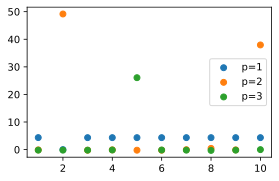

In [22]:
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
p=[1, 2, 3]

for p in p:
    print(f"\nRight now calculating p = {p}\n")
    energy_difference = []
    x=[]
    for i in range(num_runs):
        expectation_values_qtensor = QtensorQAOAExpectationValuesMIS(problem, p)
        expectation_values_qtensor.optimize()
        energy_qtensor = float(expectation_values_qtensor.energy)
        print(energy_qtensor)
        energy_difference.append((energy_single-energy_qtensor)/energy_qtensor)
        x.append(i+1)

    plt.scatter(x, energy_difference, color=colors[p-1], label=f'p={p}')
    plt.legend()

In [23]:
plt.show()

[autoreload of qtensor failed: Traceback (most recent call last):
  File "/Users/q619238/Environments/env5/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/q619238/Environments/env5/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/q619238/qiro/Parameter_optimisation/../Qtensor/qtensor/__init__.py", line 11, in <module>
    from .CircuitComposer import QAOAComposer, OldQAOAComposer, ZZQAOAComposer, WeightedZZQAOAComposer, CircuitComposer, ZZQAOAComposer_MIS, 

## MAXCUT: 50 nodes regular graph with RMSprop

In [15]:
reg = 3
n = 50
seed = 666
p=10
G = nx.random_regular_graph(reg, n)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=10
problem = Generator.MAXCUT(G)

In [16]:
expectation_values_single = SingleLayerQAOAExpectationValues(problem)
expectation_values_single.optimize()
energy_single = expectation_values_single.energy
print(energy_single)

-27.888044324552396


In [17]:
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
p=[1, 2, 3]

for p in p:
    print(f"\nRight now calculating p = {p}\n")
    energy_difference = []
    x=[]
    for i in range(num_runs):
        expectation_values_qtensor = QtensorQAOAExpectationValuesMAXCUT(problem, p)
        expectation_values_qtensor.optimize()
        energy_qtensor = float(expectation_values_qtensor.energy)
        print(energy_qtensor)
        energy_difference.append((energy_single-energy_qtensor)/energy_qtensor)
        x.append(i+1)

    plt.scatter(x, energy_difference, color=colors[p-1], label=f'p={p}')
    plt.legend()


Right now calculating p = 1

Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-27.881664688669037
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-27.890415065428144
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-27.86203088517626
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-27.890367502603116
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-27.890415094719962
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-27.786261990655348
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-27.736880354889767
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-27.89041509471977
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-27.867485584464976
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-27.89041509142311

Right now calculating p = 2

Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-34.193742933143824
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-36.49105403898506
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-36.8219909828437
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-36.684160471562194
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-36.91038050949053
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-36.67375594164954
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-34.44114074478534
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-32.31967295006297
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-36.89701672704756
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-37.03117570427649

Right now calculating p = 3

Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-42.221052643442924
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
plt.show()

## MAXCUT: 100 nodes regular graph with RMSprop

In [ ]:
reg = 3
n = 100
seed = 666
p=10
G = nx.random_regular_graph(reg, n)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=10
problem = Generator.MAXCUT(G)

In [ ]:
expectation_values_single = SingleLayerQAOAExpectationValues(problem)
expectation_values_single.optimize()
energy_single = expectation_values_single.energy
print(energy_single)

/Users/q619238/Environments/env5/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


-28.53673806196422



Right now calculating p = 1

Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-28.536733597775463

Right now calculating p = 2

Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-37.853898344720825

Right now calculating p = 3

Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-40.358654988118886


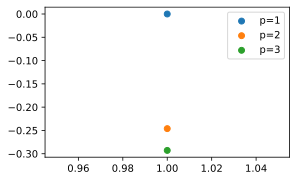

In [ ]:
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
p=[1, 2, 3]

for p in p:
    print(f"\nRight now calculating p = {p}\n")
    energy_difference = []
    x=[]
    for i in range(num_runs):
        expectation_values_qtensor = QtensorQAOAExpectationValuesMAXCUT(problem, p)
        expectation_values_qtensor.optimize()
        energy_qtensor = float(expectation_values_qtensor.energy)
        print(energy_qtensor)
        energy_difference.append((energy_single-energy_qtensor)/energy_qtensor)
        x.append(i+1)

    plt.scatter(x, energy_difference, color=colors[p-1], label=f'p={p}')
    plt.legend()

## MAXCUT: 150 nodes regular graph with RMSprop

In [ ]:
reg = 3
n = 150
seed = 666
p=10
G = nx.random_regular_graph(reg, n)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=10
problem = Generator.MAXCUT(G)

In [ ]:
expectation_values_single = SingleLayerQAOAExpectationValues(problem)
expectation_values_single.optimize()
energy_single = expectation_values_single.energy
print(energy_single)

-27.888044324552396


In [ ]:
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
p=[1, 2, 3]

for p in p:
    print(f"\nRight now calculating p = {p}\n")
    energy_difference = []
    x=[]
    for i in range(num_runs):
        expectation_values_qtensor = QtensorQAOAExpectationValuesMAXCUT(problem, p)
        expectation_values_qtensor.optimize()
        energy_qtensor = float(expectation_values_qtensor.energy)
        print(energy_qtensor)
        energy_difference.append((energy_single-energy_qtensor)/energy_qtensor)
        x.append(i+1)

    plt.scatter(x, energy_difference, color=colors[p-1], label=f'p={p}')
    plt.legend()


Right now calculating p = 1

Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

-27.881664688669037
Graph with 50 nodes and 75 edges


  0%|          | 0/50 [00:00<?, ?it/s]

In [53]:
print(expectation_values_single.expect_val_dict)

{frozenset({1}): -0.2691354495735322, frozenset({2}): -0.2691354495735322, frozenset({3}): -0.2691354495735322, frozenset({4}): -0.2691354495735322, frozenset({5}): -0.2691354495735322, frozenset({6}): -0.2691354495735322, frozenset({7}): -0.2691354495735322, frozenset({8}): -0.2691354495735322, frozenset({9}): -0.2691354495735322, frozenset({10}): -0.2691354495735322, frozenset({11}): -0.2691354495735322, frozenset({12}): -0.2691354495735322, frozenset({13}): -0.2691354495735322, frozenset({14}): -0.2691354495735322, frozenset({15}): -0.2691354495735322, frozenset({16}): -0.2691354495735322, frozenset({17}): -0.2691354495735322, frozenset({18}): -0.2691354495735322, frozenset({19}): -0.2691354495735322, frozenset({20}): -0.2691354495735322, frozenset({21}): -0.2691354495735322, frozenset({22}): -0.2691354495735322, frozenset({23}): -0.2691354495735322, frozenset({24}): -0.2691354495735322, frozenset({25}): -0.2691354495735322, frozenset({26}): -0.2691354495735322, frozenset({27}): -0.

In [54]:
print(expectation_values_qtensor.expect_val_dict)

{frozenset({28}): -0.26940367841784907, frozenset({48}): -0.26940367841784896, frozenset({1}): -0.26940367841784907, frozenset({31}): -0.26940367841784896, frozenset({11}): -0.26940367841784896, frozenset({38}): -0.26940367841784896, frozenset({43}): -0.26940367841784896, frozenset({46}): -0.26940367841784896, frozenset({7}): -0.26940367841784896, frozenset({16}): -0.26940367841784896, frozenset({34}): -0.26940367841784907, frozenset({37}): -0.26940367841784896, frozenset({12}): -0.26940367841784896, frozenset({40}): -0.26940367841784896, frozenset({8}): -0.26940367841784896, frozenset({27}): -0.26940367841784896, frozenset({13}): -0.26940367841784896, frozenset({17}): -0.26940367841784907, frozenset({25}): -0.26940367841784907, frozenset({26}): -0.26940367841784907, frozenset({42}): -0.26940367841784896, frozenset({23}): -0.26940367841784896, frozenset({49}): -0.26940367841784907, frozenset({15}): -0.26940367841784896, frozenset({45}): -0.26940367841784896, frozenset({22}): -0.2694036

In [20]:
qaoa_sim = QAOAQtreeSimulator_MIS(ZZQtreeQAOAComposer_MIS)

In [21]:
def torch_param(x):
    return torch.tensor(x, requires_grad=True)

backend = TorchBackend()
sim = qtensor.QtreeSimulator(backend=backend)

In [22]:
E_nodes = []
E_edges=[]

def loss_func(alpha, gamma, beta, G):
    composer=qtensor.TorchQAOAComposer_MIS(G, alpha=alpha, gamma=gamma, beta=beta)
    loss = torch.tensor([0.])
    E_nodes = []
   
    for node in G.nodes():
        composer.energy_expectation_lightcone_node(node)
        E = torch.real(sim.simulate(composer.circuit))
        composer.builder.reset()
        loss -= 0.5*E
        E_nodes.append(E)

    for edge in G.edges():
        composer.energy_expectation_lightcone(edge)
        E = torch.real(sim.simulate(composer.circuit))
        composer.builder.reset()
        loss += alpha*0.25*(E+E_nodes[edge[0]]+E_nodes[edge[1]])
       
    return loss

def optimize_parameters(loss_func, *params, steps=50, pbar=True, 
                        Opt=torch.optim.RMSprop, opt_kwargs=dict(), **kwargs):
    opt = Opt(params=params, **opt_kwargs)
    losses = []
    steps = steps
    param_history = []
    param_history.append([x.detach().numpy().copy() for x in params])
    
    
    if pbar:
        from tqdm.auto import tqdm
        _pbar = tqdm(total=steps)
    else:
        _pbar = None

    for i in range(steps):
        loss = loss_func(*params, **kwargs)
        opt.zero_grad()
        loss.backward()
        opt.step()

        losses.append(loss.detach().numpy().data)
        param_history.append([x.detach().numpy().copy() for x in params])
        if pbar:
            _pbar.update(1)

    max_expect_val = 0

    for node in G.nodes():
        #+1 introduced to be comparable with SingleLayerQAOAExpectationValues:
        expect_val_dict[frozenset({problem.position_translater.index(node+1)})]=float(
            E_nodes[node])
        #self.expect_val_dict[frozenset({node+1})]=float(self.E_nodes[node])
        if abs(float(E_nodes[node])) > max_expect_val:
            max_expect_val = abs(float(E_nodes[node]))
            max_expect_val_sign = np.sign(float(E_nodes[node]))
            max_expect_val_location = node
            
    for edge in self.graph.edges():
        self.expect_val_dict[frozenset({self.problem.position_translater.index(max(edge)+1), problem.position_translater.index(min(edge)+1)})]=float(E_edges[edge])
        #self.expect_val_dict[frozenset({edge[0]+1, edge[1]+1})]=float(self.E_edges[edge])
        if abs(float(self.E_edges[edge])) > max_expect_val:
            max_expect_val = abs(float(self.E_edges[edge]))
            max_expect_val_location = edge 

    self.energy = self.loss

    return losses, param_history

In [34]:
p=1
gamma, beta = [0.1]*p, [0.2]*p
alpha = 1.1
gamma, beta = torch_param(gamma), torch_param(beta)
alpha = torch.tensor(alpha, requires_grad=False)
losses, param_history = optimize_parameters(loss_func, alpha, gamma, beta, G=G)

  0%|          | 0/50 [00:00<?, ?it/s]

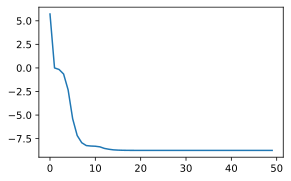

In [25]:
plt.plot(losses)

In [32]:
print(type(losses[-1]))

<class 'memoryview'>


In [ ]:
def energy(parameters):
    gamma, beta = [], []
    for i in range(p):
        gamma.append(parameters[2*i])
        beta.append(parameters[2*i+1])
    E = qaoa_sim.energy_expectation(G, alpha, gamma, beta)
    
    return E

In [ ]:
def calculate_single_solution(G, nc, reg, n, ps, pbar, output_steps):
    random.seed()
    output_dict={}

    #for regular graphs:
    #G = nx.random_regular_graph(reg, n)

    #for Erdos Renyi graphs:
    #prob = reg/(n-1) 
    #G = nx.erdos_renyi_graph(n, prob)

    output_dict["graph"] = G

    size_indep_set_min_greedy = greedy_mis(G)
    output_dict["size_indep_set_min_greedy"] = size_indep_set_min_greedy

    size_indep_set_random_greedy = random_greedy_mis(G)
    output_dict["size_indep_set_random_greedy"] = size_indep_set_random_greedy
    
    problem = Generator.MIS(G)

    expectation_values_single = SingleLayerQAOAExpectationValues(problem)
    qiro_single = QIRO_MIS(nc, expectation_values_single)
    #qiro_single.execute()
    qiro_single.execute()
    solution_single = qiro_single.solution
    size_indep_set_qiro_single = np.sum(solution_single >= 0)
    output_dict["output_single_p"] = [size_indep_set_qiro_single, solution_single]

    results_qtensor = {}

    for p in ps:
        print(f"\nRight now calculating p={p}")
        expectation_values_Qtensor = QtensorQAOAExpectationValuesMIS(problem, p, pbar=pbar)
        qiro_qtensor = QIRO_MIS(nc, expectation_values_Qtensor, output_steps=output_steps)
        start_time = time()
        #qiro_qtensor.execute()
        qiro_qtensor.execute()
        end_time = time()
        solution_qtensor = qiro_qtensor.solution
        size_indep_set_qiro_qtensor = np.sum(solution_qtensor >= 0)  
        results_qtensor[f'p={p}'] = [size_indep_set_qiro_qtensor, solution_qtensor]

    output_dict["output_qtensor"] = results_qtensor
    
    return output_dict

def give_results(G, nc, reg, n, ps, number_of_cases, pbar=True, output_steps=True, parallel = False):
    if parallel==False:
        results_list = []
        for i in range(number_of_cases):
            result = calculate_single_solution(G, nc, reg, ns, ps, pbar, output_steps, number_of_cases)
            results_list.append(result)

    return results_list


In [ ]:
for regularity in reg: 
    for n in ns: 
        random.seed()
        output_dict={}

        #for regular graphs:
        G = nx.random_regular_graph(regularity, n)

        #for Erdos Renyi graphs:
        prob = regularity/(n-1) 
        G = nx.erdos_renyi_graph(n, prob)

        for p in ps:
            p=[p]
            results_dict = {}
            results_dict["General info"]={'reg': reg, 'p': p, 'n': n, 'number of cases': number_of_cases}
            print(f"\nRight now calculating regularity={regularity}, n={n}")
            results=give_results(G, nc, regularity, n, p, pbar=False, output_steps=False, parallel=True)
            results_dict[f"reg_{regularity}_n_{n}_p_{p[0]}"]= results
            #results_dict_all[f"reg_{regularity}_n_{n}_numCases_{number_of_cases}"]= results
